In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [2]:
%load_ext autoreload
%aimport pipeline
%autoreload 1

In [105]:
obj_name = 'NGC6778'
Te_corr = 3000
random_seed = 42
PDF_name = 'figures/{}_{}'.format(obj_name, Te_corr)
data_dir = Path(os.environ['MUSE_DATA']) / Path('{}/maps'.format(obj_name))
save_plots = False

In [109]:
PL = pipeline.PipeLine(data_dir = data_dir,
                       obj_name = obj_name, 
                       error_str='error', err_default=0.05,
                       random_seed=random_seed,
                       flux_normalisation=1e-20)

PL.log_.level=1

PL.obs.addSum(('O1r_7771A', 'O1r_7773A', 'O1r_7775A'), 'O1r_7773+')

PL.obs.removeLine('O1r_7771A')
PL.obs.removeLine('O1r_7773A')
PL.obs.removeLine('O1r_7775A')
PL.obs.getLine(label='O2r_4649.13A').to_eval = 'L(4649.13) + L(4650.84)'

PL.add_MC(50)

PL.obs.def_EBV()
PL.red_cor_obs(EBV_min = 0., plot_=False)    

PL.correc_NII(Te_corr)
PL.correc_OII(Te_corr, rec_label='O2r_4649.13A')
PL.read_TeNe('{}_{}_TeNe.pickle.gz'.format(obj_name, Te_corr))
PL.read_abunds('{}_{}_abunds.pickle.gz'.format(obj_name, Te_corr))

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4614: RuntimeWarning: invalid value encountered in true_divide
  err_fits_data = err_fits_data / fits_data
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4614: RuntimeWarning: invalid value encountered in true_divide
  err_fits_data = err_fits_data / fits_data
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4537: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data_tab = np.genfromtxt(obsFile, dtype=None, delimiter=delimiter, names=True)
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4747: RuntimeWarning: invalid value encountered in true_divide
  obs_over_theo = (line1.obsIntens / line2.obsIntens) / r_theo


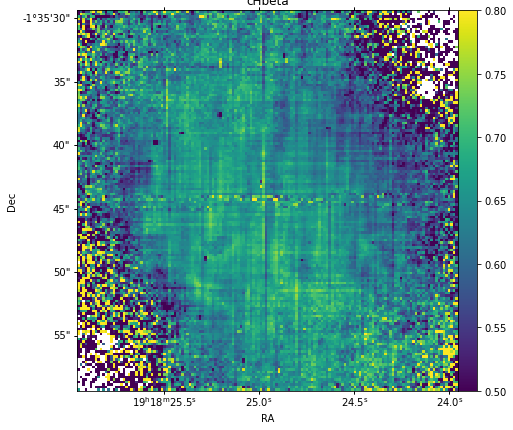

In [122]:
f,ax = plt.subplots(1, 1, figsize=(8, 7), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax, image=PL.get_image(PL.obs.extinction.cHbeta, type_='orig'), vmin=0.5, vmax=.8, title='cHbeta',
            label_cut=('H1r_6563A', 'H1r_4861A'), SN_cut=2.5)
if save_plots:
    f.savefig(PDF_name+'_cHbeta.pdf')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


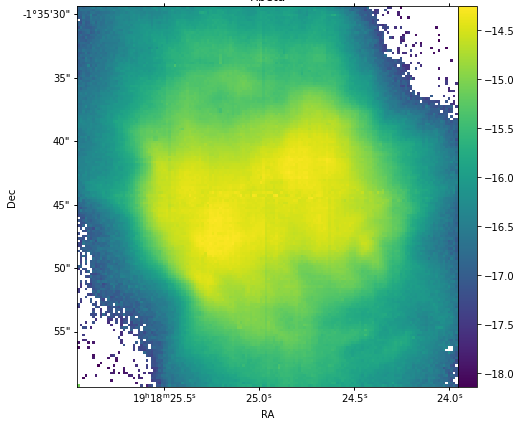

In [124]:
f,ax = plt.subplots(1, 1, figsize=(8, 7), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax, label='H1r_4861A', title='Hbeta', SN_cut=5.5, use_log=True)
if save_plots:
    f.savefig(PDF_name+'_Hbeta.pdf')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


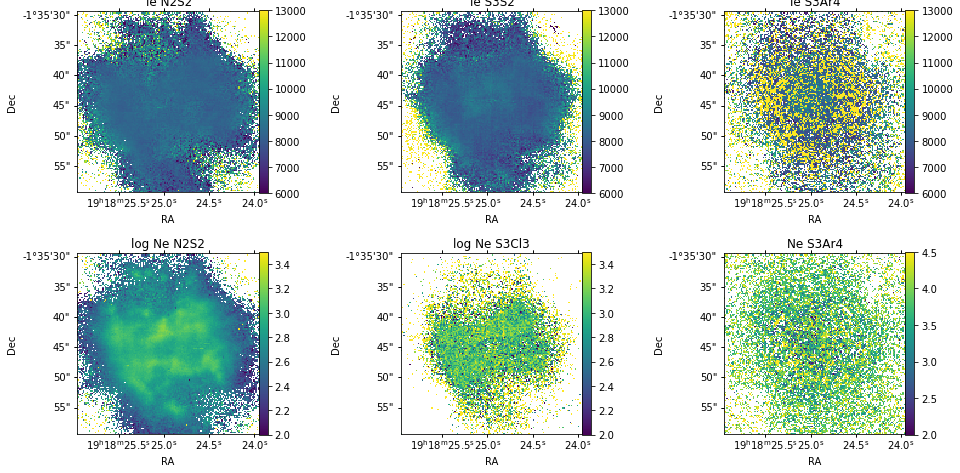

In [125]:
SN_cut = 2
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, subplot_kw={'projection': PL.obs.wcs}, figsize=(15,10))
PL.plot(ax=ax1, data=PL.TeNe['N2S2']['Te'], title='Te N2S2', vmin=6000, vmax=13000, 
        label_cut=('N2_6548A', 'N2_5755A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut)
PL.plot(ax=ax2, data=PL.TeNe['S3S2']['Te'], title='Te S3S2', vmin=6000, vmax=13000, 
        label_cut=('S3_9069A', 'S3_6312A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut)
PL.plot(ax=ax3, data=PL.TeNe['S3Ar4']['Te'], title='Te S3Ar4', vmin=6000, vmax=13000, 
        label_cut=('S3_9069A', 'S3_6312A', 'Ar4_4711A', 'Ar4_4740A'), SN_cut=None)
PL.plot(ax=ax4, data=np.log10(PL.TeNe['N2S2']['Ne']), title='log Ne N2S2', vmin=2, vmax=3.5, 
        label_cut=('N2_6548A', 'N2_5755A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut)
PL.plot(ax=ax5, data=np.log10(PL.TeNe['S3Cl3']['Ne']), title='log Ne S3Cl3', vmin=2, vmax=3.5, 
        label_cut=('S3_9069A', 'S3_6312A', 'Cl3_5518A', 'Cl3_5538A'), SN_cut=SN_cut, type_='orig')
PL.plot(ax=ax6, data=np.log10(PL.TeNe['S3Ar4']['Ne']), title='Ne S3Ar4', vmin=2, vmax=4.5, 
        label_cut=('S3_9069A', 'S3_6312A', 'Ar4_4711A', 'Ar4_4740A'), SN_cut=None, type_='median')
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=-0.2)
if save_plots:
    f.savefig(PDF_name+'_TeNe.pdf')

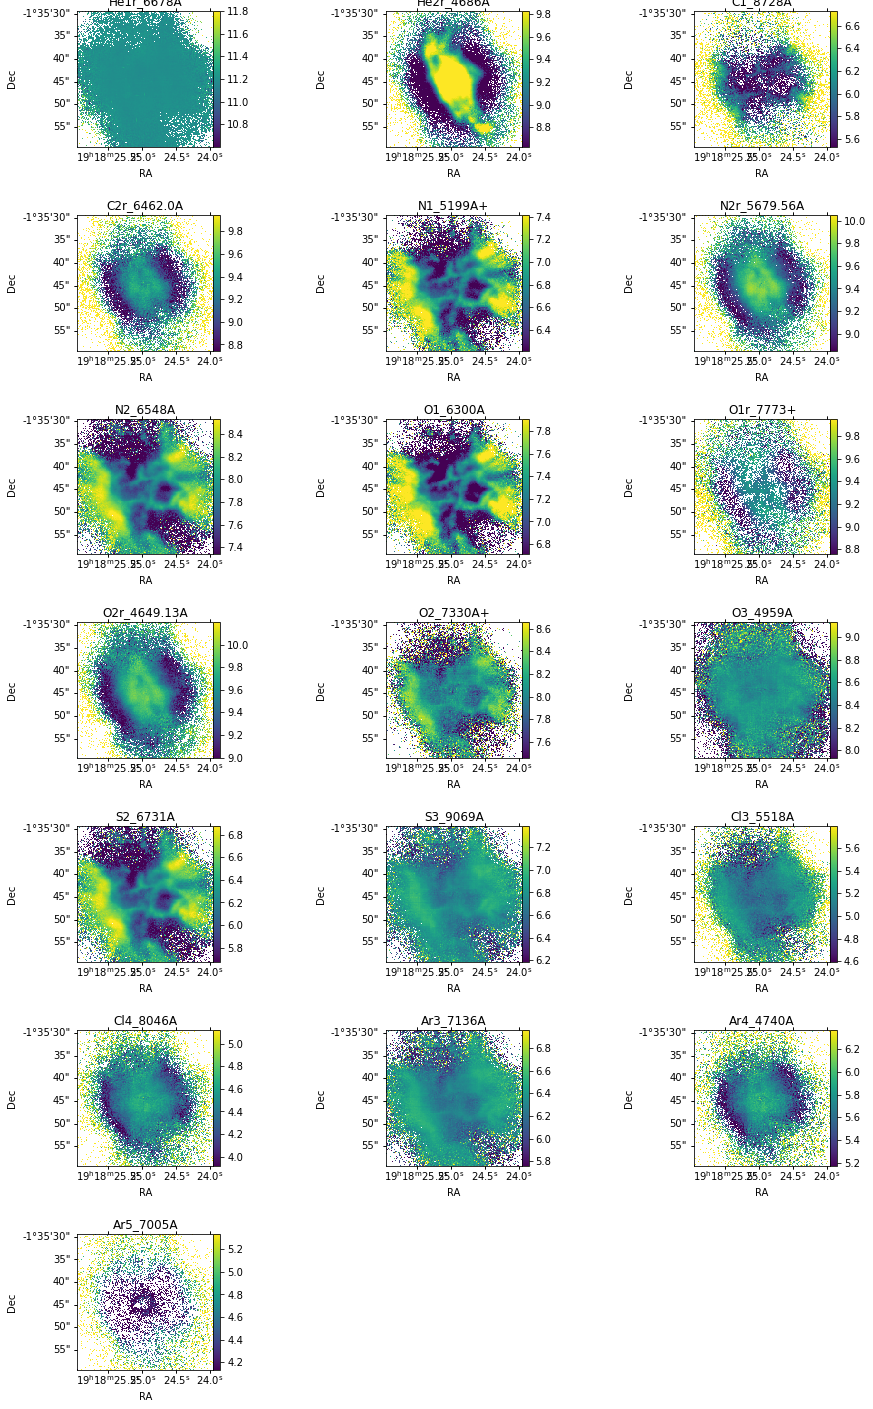

In [126]:
line_labels = ('He1r_6678A', 'He2r_4686A', 'C1_8728A', 'C2r_6462.0A', 'N1_5199A+', 
               'N2_6548A', 'N2r_5679.56A', 'O1_6300A', 'O1r_7773+', 'O2_7330A+',
               'O2r_4649.13A', 'O3_4959A', 'S2_6731A', 'S3_9069A',
               'Cl3_5518A', 'Cl4_8046A', 'Ar3_7136A', 'Ar4_4740A', 'Ar5_7005A')

f, axes = plt.subplots(7,3,figsize=(15,25), subplot_kw={'projection': PL.obs.wcs})
i_axes = 0
for line in PL.obs.getSortedLines(crit='mass'):
    if line.label in line_labels:
        if line.is_valid:
            mask = PL.get_mask_SN(line.label, 1.5)
            with np.errstate(divide='ignore', invalid='ignore'):
                to_show = 12+np.log10(PL.abund_dic[line.label])
            to_show[np.isinf(to_show)] = np.nan
            med = np.nanmedian(PL.get_image(to_show, type_='orig')[~mask])
            to_show[to_show < (med - 6)] = np.nan
            med = np.nanmedian(PL.get_image(to_show, type_='orig')[~mask])
            std = np.nanstd(PL.get_image(to_show, type_='orig')[~mask])
            vmin = med - 0.6
            vmax = med + 0.6
            #print(line.label, max_to_show, med, std, vmin, vmax, mask.sum())
            PL.plot(data=to_show, title=line.label, ax=axes.ravel()[i_axes], vmin=vmin, vmax=vmax, type_='orig', mask=mask)
            i_axes += 1
        else:
            print('{} is invalid'.format(line.label))
axes.ravel()[-2].remove()
axes.ravel()[-1].remove()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
if save_plots:
    f.savefig(PDF_name+'_abunds.pdf')


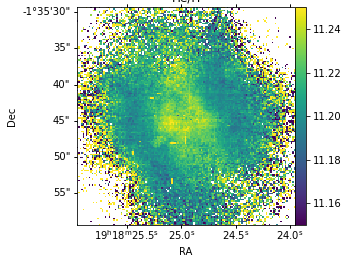

In [127]:
PL.abund_dic['He'] = PL.abund_dic['He1r_6678A'] + PL.abund_dic['He2r_4686A']
f, ax = plt.subplots(subplot_kw={'projection': PL.obs.wcs})
with np.errstate(divide='ignore', invalid='ignore'):
    PL.plot(data=12+np.log10(PL.abund_dic['He']), title='He/H', vmin=11.15, vmax=11.25, 
            type_='orig', ax=ax)
if save_plots:
    f.savefig(PDF_name+'_HeoH.pdf')    

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1539: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


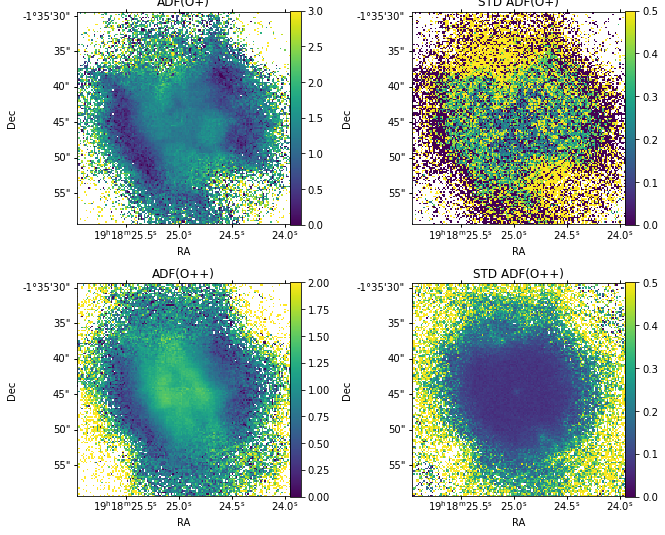

In [128]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10), subplot_kw={'projection': PL.obs.wcs})

with np.errstate(divide='ignore', invalid='ignore'):
    ADF_Op = np.log10(PL.abund_dic['O1r_7773+'] / (PL.abund_dic['O2_7319A+'] + PL.abund_dic['O2_7330A+']) * 2)
    ADF_Opp = np.log10(PL.abund_dic['O2r_4649.13A'] / PL.abund_dic['O3_4959A'])

PL.plot(data=ADF_Op, title='ADF(O+)', ax=ax1, vmin=0, vmax=3., type_='orig')
PL.plot(data=ADF_Op, title='STD ADF(O+)', ax=ax2, vmin=0, vmax=.5, type_='std')
PL.plot(data=ADF_Opp, title='ADF(O++)', ax=ax3, vmin=0, vmax=2., type_='orig')
PL.plot(data=ADF_Opp, title='STD ADF(O++)', ax=ax4, vmin=0, vmax=.5, type_='std')
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.)
if save_plots:
    f.savefig(PDF_name+'_ADFs.pdf')    

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


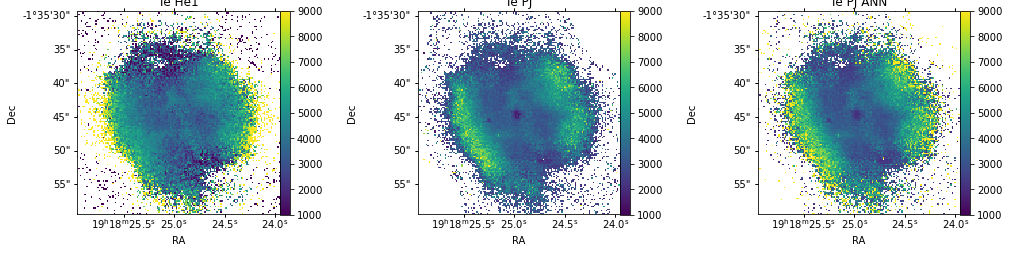

In [129]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'projection': PL.obs.wcs}, figsize=(16,6))
if obj_name == 'HF22':
    vmin=1000
    vmax=4000
else:
    vmin=1000
    vmax=9000
PL.plot(data=PL.TeNe['He1']['Te'], vmin=vmin, vmax=vmax, title='Te He1', ax=ax1, SN_cut=4, label_cut='He1r_7281A')
PL.plot(data=PL.TeNe['PJ']['Te'], vmin=vmin, vmax=vmax,  title='Te PJ', ax=ax2, SN_cut=4, label_cut='He1r_7281A')
PL.plot(data=PL.TeNe['PJ_ANN']['Te'], vmin=vmin, vmax=vmax,  title='Te PJ ANN', ax=ax3, SN_cut=4, label_cut='He1r_7281A')
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=0.)
if save_plots:
    f.savefig(PDF_name+'_Te_altern.pdf')

<ipython-input-121-b87f5e684bdf>:13: RuntimeWarning: divide by zero encountered in log10
  med = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label]))[0,0,:]
<ipython-input-121-b87f5e684bdf>:13: RuntimeWarning: invalid value encountered in log10
  med = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label]))[0,0,:]


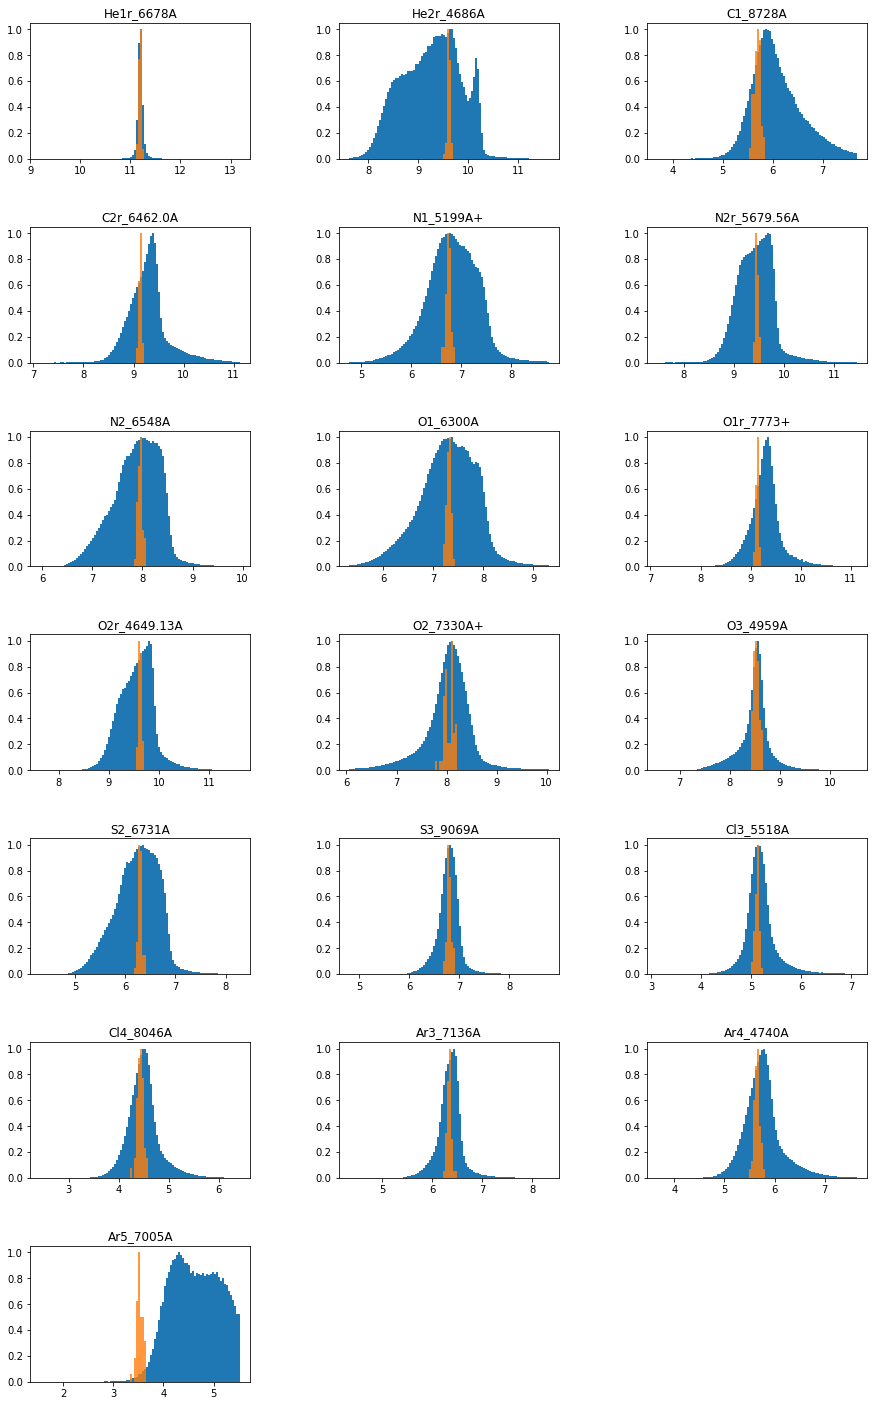

In [121]:
line_labels = ('He1r_6678A', 'He2r_4686A', 'C1_8728A', 'C2r_6462.0A', 'N1_5199A+', 
               'N2_6548A', 'N2r_5679.56A', 'O1_6300A', 'O1r_7773+', 'O2_7330A+',
               'O2r_4649.13A', 'O3_4959A', 'S2_6731A', 'S3_9069A',
               'Cl3_5518A', 'Cl4_8046A', 'Ar3_7136A', 'Ar4_4740A', 'Ar5_7005A')

f, axes = plt.subplots(7,3,figsize=(15,25))
i_axes = 0
for line in PL.obs.getSortedLines(crit='mass'):
    if line.label in line_labels:
        if line.is_valid:
            mask = PL.get_mask_SN(line.label, 2.5)
            
            med = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label]))[0,0,:]
            med0 = med[0]
            with np.errstate(divide='ignore', invalid='ignore'):
                d3d = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label])) * (1-mask[..., np.newaxis])
                d2d = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label]))[:,:,0] * (1-mask)
            ax=axes.ravel()[i_axes]
            num_bin = 100
            bin_lims = np.linspace(med0-2, med0+2,num_bin+1)
            bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
            bin_widths = bin_lims[1:]-bin_lims[:-1]
            
            hist1, _ = np.histogram(d3d.ravel(), bins=np.linspace(med0-2, med0+2, num_bin+1))
            hist2, _ = np.histogram(med.ravel(), bins=np.linspace(med0-2, med0+2, num_bin+1))
            hist1 = hist1 / np.max(hist1)
            hist2 = hist2/np.max(hist2)
            ax.bar(bin_centers, hist1, width = bin_widths, align = 'center')
            ax.bar(bin_centers, hist2, width = bin_widths, align = 'center', alpha = 0.8)
            
            ax.set_title(line.label)
            i_axes += 1
        else:
            print('{} is invalid'.format(line.label))
axes.ravel()[-2].remove()
axes.ravel()[-1].remove()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
if save_plots:
    f.savefig(PDF_name+'_hist_abunds.pdf')

In [134]:
np.std(PL.obs.reshape(PL.TeNe['He1']['Te'])[0,0,:])

743.421528592549